In [2]:
from polyglot.text import Text
from polyglot.detect import Detector
import nltk
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [3]:
# read csv file with pandas library
datatext = pd.read_csv('train.csv')

In [4]:
datatext

,content,score,upvotes
0,Çox qəşəy,5,0
1,Men niye nomre ile qeydiyatdan kece bilmirem.....,1,0
2,Salam. Mən yukluyə bilmirəm. Necə kömək edə bi...,5,0
3,cox gözəl,5,1
4,Xaiş edirem bu problemi hell edinde həftədə 2 ...,5,0
...,...,...,...
127532,Cox pisdi 24 saat 50 deyqə nedir ki güya,1,0
127533,Super çox sağ olun minnətdaram,5,0
127534,Azərbaycanda belə proqramların olması çox yaxş...,5,0
127535,Bu gün çox pis xidmət etdiniz. Ona görə boltda...,1,1


In [5]:
# remove null values
datatext.dropna(inplace=True)
datatext

,content,score,upvotes
0,Çox qəşəy,5,0
1,Men niye nomre ile qeydiyatdan kece bilmirem.....,1,0
2,Salam. Mən yukluyə bilmirəm. Necə kömək edə bi...,5,0
3,cox gözəl,5,1
4,Xaiş edirem bu problemi hell edinde həftədə 2 ...,5,0
...,...,...,...
127532,Cox pisdi 24 saat 50 deyqə nedir ki güya,1,0
127533,Super çox sağ olun minnətdaram,5,0
127534,Azərbaycanda belə proqramların olması çox yaxş...,5,0
127535,Bu gün çox pis xidmət etdiniz. Ona görə boltda...,1,1


In [6]:
# convert all letters of text to lowercase
datatext['content'] = datatext['content'].str.lower()
datatext

,content,score,upvotes
0,çox qəşəy,5,0
1,men niye nomre ile qeydiyatdan kece bilmirem.....,1,0
2,salam. mən yukluyə bilmirəm. necə kömək edə bi...,5,0
3,cox gözəl,5,1
4,xaiş edirem bu problemi hell edinde həftədə 2 ...,5,0
...,...,...,...
127532,cox pisdi 24 saat 50 deyqə nedir ki güya,1,0
127533,super çox sağ olun minnətdaram,5,0
127534,azərbaycanda belə proqramların olması çox yaxş...,5,0
127535,bu gün çox pis xidmət etdiniz. ona görə boltda...,1,1


In [7]:
s = datatext['score'].value_counts().sort_index()
s

score
1     14448
2      1947
3      2763
4      4600
5    103776
Name: count, dtype: int64

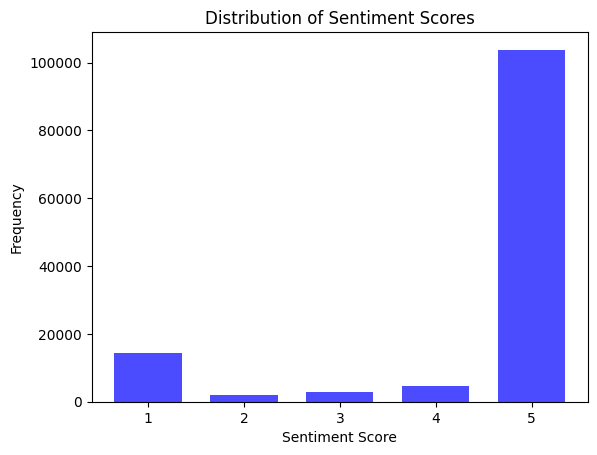

In [8]:
# Create histogram
plt.bar(s.index, s, color='blue', alpha=0.7, width=0.7)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.show()

In [9]:
u = datatext['upvotes'].value_counts().sort_index()
u

upvotes
0       104964
1        10728
2         3630
3         1816
4         1116
         ...  
2127         1
2887         1
3078         1
3120         1
4314         1
Name: count, Length: 184, dtype: int64

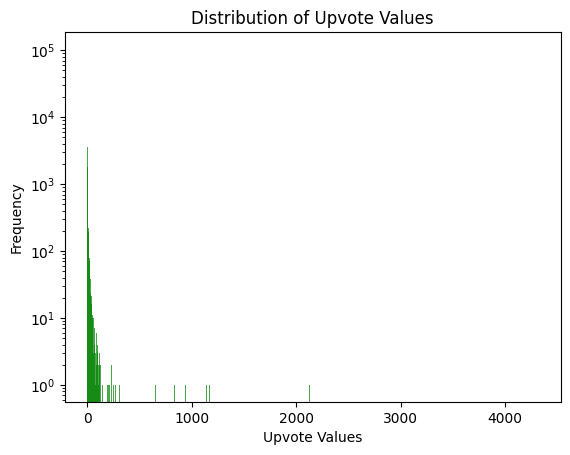

In [10]:
plt.bar(u.index, u, color='green', alpha=0.7, width=2)
plt.yscale('log')
plt.xlabel('Upvote Values')
plt.ylabel('Frequency')
plt.title('Distribution of Upvote Values')
plt.show()

In [11]:
# remove special characters
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    
    return text

datatext['content'] = datatext['content'].apply(preprocessor)
datatext

,content,score,upvotes
0,çox qəşəy,5,0
1,men niye nomre ile qeydiyatdan kece bilmirem k...,1,0
2,salam mən yukluyə bilmirəm necə kömək edə bilə...,5,0
3,cox gözəl,5,1
4,xaiş edirem bu problemi hell edinde həftədə 2 ...,5,0
...,...,...,...
127532,cox pisdi 24 saat 50 deyqə nedir ki güya,1,0
127533,super çox sağ olun minnətdaram,5,0
127534,azərbaycanda belə proqramların olması çox yaxş...,5,0
127535,bu gün çox pis xidmət etdiniz ona görə boltdan...,1,1


In [12]:
#split to train and test sets
split_point = int(len(datatext) * 0.8)
train, test = datatext[ : split_point], datatext[split_point : ]

In [13]:
train

,content,score,upvotes
0,çox qəşəy,5,0
1,men niye nomre ile qeydiyatdan kece bilmirem k...,1,0
2,salam mən yukluyə bilmirəm necə kömək edə bilə...,5,0
3,cox gözəl,5,1
4,xaiş edirem bu problemi hell edinde həftədə 2 ...,5,0
...,...,...,...
102025,əla,5,0
102026,çox yaxşıdır,5,0
102027,tamamilə pulsuz elanlar olsun,5,0
102028,cihazda root olduğu üçün tədbiq işləmir telefo...,1,2


In [14]:
test

,content,score,upvotes
102030,isime yariyir,5,0
102031,çox bəyəndim başka banklardan çox seçilir,5,0
102032,könüllü,5,0
102033,super,5,0
102034,bərbaddır yeniləyirəm yenidən yenilənmə istəyir,5,0
...,...,...,...
127532,cox pisdi 24 saat 50 deyqə nedir ki güya,1,0
127533,super çox sağ olun minnətdaram,5,0
127534,azərbaycanda belə proqramların olması çox yaxş...,5,0
127535,bu gün çox pis xidmət etdiniz ona görə boltdan...,1,1


In [15]:
all_poly = []
all_spacy = []
all_nltk = []

# Load the spaCy EN language model
nlp = spacy.load("en_core_web_sm")


for sentence in train['content']:
    sentence = str(sentence)
    
    # Polyglot Tokenization
    polyglot_text = Text(sentence, hint_language_code='az')
    polyglot_tokens = [word for word in polyglot_text.words]
    all_poly.append(polyglot_tokens)

    # NLTK Tokenization
    nltk_tokens = nltk.word_tokenize(sentence)
    all_nltk.append(nltk_tokens)

    # spaCy Tokenization
    spacy_doc = nlp(sentence)
    spacy_tokens = [token.text for token in spacy_doc]
    all_spacy.append(spacy_tokens)


In [17]:
all_poly[:3]

[['çox', 'qəşəy'],
 ['men',
  'niye',
  'nomre',
  'ile',
  'qeydiyatdan',
  'kece',
  'bilmirem',
  'kecirem',
  'mesaj',
  'gelir',
  'ki',
  'bu',
  'tetbiq',
  'işlemir',
  'islemirse',
  'niye',
  'camatin',
  'başin',
  'xarab',
  'edirsizz'],
 ['salam', 'mən', 'yukluyə', 'bilmirəm', 'necə', 'kömək', 'edə', 'bilərsiz']]

In [18]:
all_spacy[:3]

[['çox', 'qəşəy'],
 ['men',
  'niye',
  'nomre',
  'ile',
  'qeydiyatdan',
  'kece',
  'bilmirem',
  'kecirem',
  'mesaj',
  'gelir',
  'ki',
  'bu',
  'tetbiq',
  'işlemir',
  'islemirse',
  'niye',
  'camatin',
  'başin',
  'xarab',
  'edirsizz'],
 ['salam', 'mən', 'yukluyə', 'bilmirəm', 'necə', 'kömək', 'edə', 'bilərsiz']]

In [19]:
all_nltk[:3]

[['çox', 'qəşəy'],
 ['men',
  'niye',
  'nomre',
  'ile',
  'qeydiyatdan',
  'kece',
  'bilmirem',
  'kecirem',
  'mesaj',
  'gelir',
  'ki',
  'bu',
  'tetbiq',
  'işlemir',
  'islemirse',
  'niye',
  'camatin',
  'başin',
  'xarab',
  'edirsizz'],
 ['salam', 'mən', 'yukluyə', 'bilmirəm', 'necə', 'kömək', 'edə', 'bilərsiz']]

In [110]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

texts = datatext['content'].values.tolist()

# Prepare your tokenized text data
tokenizer = Tokenizer(num_words=10000)

# texts is your list of tokenized sentences
tokenizer.fit_on_texts(texts) 
sequences = tokenizer.texts_to_sequences(texts)

# Calculate and display token statistics
num_tokens = [len(tokens) for tokens in sequences]
num_tokens = np.array(num_tokens)

# Set the maximum number of tokens based on mean and standard deviation
max_tokens = int(np.mean(num_tokens) + 2 * np.std(num_tokens))

data = pad_sequences(sequences,max_tokens)

# Display padded data shapes
print("Tokens shape:", data.shape)

data_shape = data.shape[1]

Tokens shape: (127534, 16)


In [111]:
print(texts[7])
sequences[7]

ancag nida gəlir program çox gec açır nəmm e


[1652, 3748, 146, 192, 3, 179, 1677, 390]

In [112]:
from tensorflow.keras.layers import Embedding, GRU, Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input

# Define and create an embedding layer
vocab_size = 10000
embedding_dim = 100

embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim)

# Build an RNN with GRU layers on top of the embedding layer
model = Sequential()
model.add(Input(shape=(data_shape,)))
model.add(embedding_layer)
model.add(GRU(64, return_sequences=True))
model.add(Activation('relu'))
model.add(GRU(32))
model.add(Activation('tanh'))

# Change activation function here
model.add(Dense(1, activation='sigmoid')) 

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 16, 100)        │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_4 (GRU)                     │ (None, 16, 64)         │        31,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 16, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_5 (GRU)                     │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,041,313 (3.97 MB)

 Trainable params: 1,041,313 (3.97 MB)

 Non-trainable params: 0 (0.00 B)

In [113]:
scores = np.array(train['score'].values.tolist())
upvotes = np.array(train['upvotes'].values.tolist())
print(scores.size)
print(upvotes.size)

102027
102027


In [114]:
binary_labels = []

for i in range(scores.size):
    if upvotes[i] > 1000:
        binary_labels.append(1)
    elif scores[i] > 3:
        binary_labels.append(1)
    else:
        binary_labels.append(0)

In [115]:
binary_labels = np.array(binary_labels)
binary_labels

array([1, 0, 1, ..., 1, 0, 0])

In [116]:
# Training
history = []
history.append(model.fit(data[:split_point], binary_labels, epochs=5, batch_size=256))

Epoch 1/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - accuracy: 0.8666 - loss: 0.3069
Epoch 2/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9283 - loss: 0.1969
Epoch 3/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9363 - loss: 0.1817
Epoch 4/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.9487 - loss: 0.1570
Epoch 5/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.9557 - loss: 0.1392


In [117]:
test_padding = data[split_point:]
test_scores = np.array(test['score'].values.tolist())
test_binary_labels = np.array([1 if rating > 3 else 0 for rating in test_scores])

print(test_padding.shape)
print(test_binary_labels.shape)

(25507, 16)
(25507,)


In [118]:

# evaluate the result
def evaluate_model(model) :
    loss, accuracy = model.evaluate(test_padding, test_binary_labels)
    print(f"Model Name: {model.name}")
    print(f"Loss: {loss}")
    print(f"Accurcy: {accuracy}")

In [119]:
evaluate_model(model)

798/798 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9032 - loss: 0.2753
Model Name: sequential_2
Loss: 0.2702871263027191
Accurcy: 0.9046144485473633


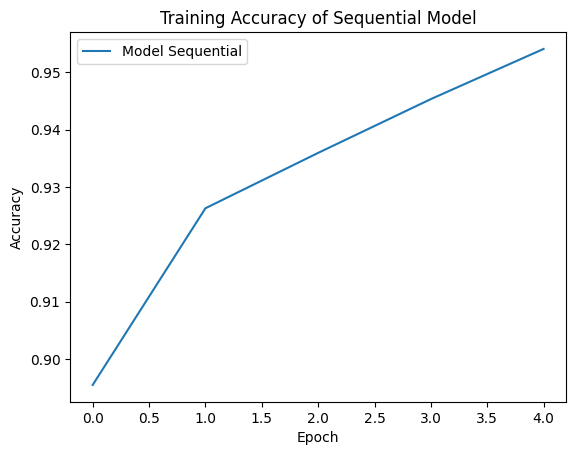

In [120]:
plt.plot(history[0].history['accuracy'], label=f'Model Sequential')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy of Sequential Model')
plt.legend()
plt.show()

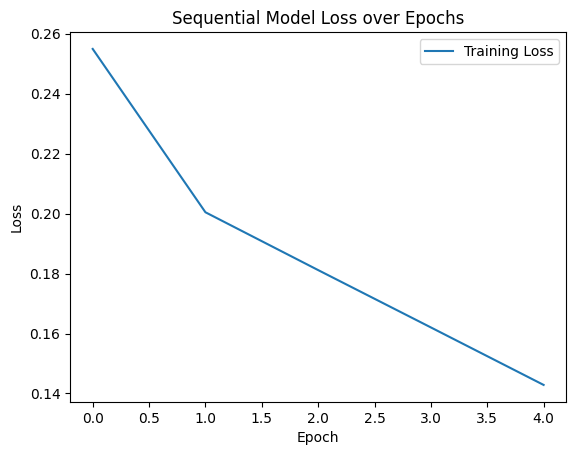

In [121]:
# Plot training loss
plt.plot(history[0].history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Sequential Model Loss over Epochs')
plt.legend()
plt.show()

In [122]:
import numpy as np
from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.models import Sequential
from sklearn.feature_extraction.text import CountVectorizer
from keras.layers import Embedding

glove_file = "glove.6B.100d.txt"

embeddings_index = {}
with open(glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

vectorizer = CountVectorizer()
vectorizer.fit(texts)
voc = vectorizer.get_feature_names_out()

num_tokens = len(voc) + 2
word_index = dict(zip(voc, range(len(voc))))
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))
print(embedding_matrix.shape)

embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
    trainable=False,
)
embedding_layer.build((1,))
embedding_layer.set_weights([embedding_matrix])



Converted 4650 words (62012 misses)
(66664, 100)


2024-05-06 13:16:17.745108: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 26665600 exceeds 10% of free system memory.
2024-05-06 13:16:17.752318: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 26665600 exceeds 10% of free system memory.
2024-05-06 13:16:17.755773: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 26665600 exceeds 10% of free system memory.
2024-05-06 13:16:17.827432: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 26665600 exceeds 10% of free system memory.


In [123]:

# Build an RNN with GRU layers on top of the embedding layer
model2 = Sequential()
model2.add(Input(shape=(data_shape,)))
model2.add(embedding_layer)
model2.add(GRU(64, return_sequences=True))
model2.add(GRU(32))

# Change activation function here
model2.add(Dense(1, activation='sigmoid')) 

# Compile the model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 16, 100)        │     6,666,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_6 (GRU)                     │ (None, 16, 64)         │        31,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_7 (GRU)                     │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,707,713 (25.59 MB)

 Trainable params: 41,313 (161.38 KB)

 Non-trainable params: 6,666,400 (25.43 MB)

In [124]:
history.append(model2.fit(data[:split_point], binary_labels, epochs=5, batch_size=256))

Epoch 1/5


399/399 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.8432 - loss: 0.3427
Epoch 2/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.8651 - loss: 0.3058
Epoch 3/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.8715 - loss: 0.2992
Epoch 4/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.8726 - loss: 0.2985
Epoch 5/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.8764 - loss: 0.2897


In [125]:
evaluate_model(model2)

798/798 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8730 - loss: 0.2993
Model Name: sequential_3
Loss: 0.2974836826324463
Accurcy: 0.8713686466217041


In [126]:
from gensim.models import KeyedVectors

# Load FastText embeddings
fasttext_model = KeyedVectors.load_word2vec_format('cc.az.300.vec.gz')

# Save FastText embeddings as GloVe format
#fasttext_model.save_word2vec_format('cc.az.300_glove.txt', binary=False)  #uncomment this lines to create glove file

# Save FastText embeddings as Word2Vec format
#fasttext_model.save_word2vec_format('cc.az.300_word2vec.txt', binary=True) #uncomment this lines to create word2vec file


In [127]:
# Load GloVe embeddings
glove_model = KeyedVectors.load_word2vec_format('cc.az.300_glove.txt', binary=False)

# Load Word2Vec embeddings
word2vec_model = KeyedVectors.load_word2vec_format('cc.az.300_word2vec.txt', binary=True)


In [128]:
glove_model.vectors[:vocab_size, :embedding_dim].shape

(10000, 100)

In [129]:
# Define model architecture for pre-trained Glove
model3 = Sequential()
model3.add(Input(shape=(data_shape,)))
model3.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim,
                    weights=[glove_model.vectors[:vocab_size, :embedding_dim]], trainable=False))  # Use GloVe embeddings
model3.add(GRU(units=128, dropout=0.2, recurrent_dropout=0.2))
model3.add(Dense(units=1, activation='sigmoid'))  # Binary classification, so using sigmoid activation

# Compile the model
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 16, 100)        │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_8 (GRU)                     │ (None, 128)            │        88,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,088,449 (4.15 MB)

 Trainable params: 88,449 (345.50 KB)

 Non-trainable params: 1,000,000 (3.81 MB)

In [130]:
history.append(model3.fit(data[:split_point], binary_labels, epochs=5, batch_size=256))

Epoch 1/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.8512 - loss: 0.3611
Epoch 2/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.8610 - loss: 0.3187
Epoch 3/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.8671 - loss: 0.3061
Epoch 4/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.8704 - loss: 0.3015
Epoch 5/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.8749 - loss: 0.2918


In [131]:
evaluate_model(model3)

798/798 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8665 - loss: 0.3038
Model Name: sequential_4
Loss: 0.30025172233581543
Accurcy: 0.8689379096031189


In [132]:
# Define model architecture for pre-trained word2vec
model4 = Sequential()
model4.add(Input(shape=(data_shape,)))
model4.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim,
                    weights=[word2vec_model.vectors[:vocab_size, :embedding_dim]], trainable=False))  # Use GloVe embeddings
model4.add(GRU(units=128, dropout=0.2, recurrent_dropout=0.2))
model4.add(Dense(units=1, activation='sigmoid'))  # Binary classification, so using sigmoid activation

# Compile the model
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model4.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 16, 100)        │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_9 (GRU)                     │ (None, 128)            │        88,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,088,449 (4.15 MB)

 Trainable params: 88,449 (345.50 KB)

 Non-trainable params: 1,000,000 (3.81 MB)

In [133]:
history.append(model4.fit(data[:split_point], binary_labels, epochs=5, batch_size=256))

Epoch 1/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.8469 - loss: 0.3607
Epoch 2/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.8643 - loss: 0.3166
Epoch 3/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.8685 - loss: 0.3040
Epoch 4/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.8729 - loss: 0.2974
Epoch 5/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.8752 - loss: 0.2925


In [134]:
evaluate_model(model4)

798/798 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8674 - loss: 0.3035
Model Name: sequential_5
Loss: 0.29952892661094666
Accurcy: 0.8692907691001892


In [135]:
# Define model architecture for pre-trained FastText
model5 = Sequential()
model5.add(Input(shape=(data_shape,)))
model5.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim,
                    weights=[fasttext_model.vectors[:vocab_size, :embedding_dim]], trainable=False))  # Use GloVe embeddings
model5.add(GRU(units=128, dropout=0.2, recurrent_dropout=0.2))
model5.add(Dense(units=1, activation='sigmoid'))  # Binary classification, so using sigmoid activation

# Compile the model
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model5.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ (None, 16, 100)        │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_10 (GRU)                    │ (None, 128)            │        88,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,088,449 (4.15 MB)

 Trainable params: 88,449 (345.50 KB)

 Non-trainable params: 1,000,000 (3.81 MB)

In [136]:
history.append(model5.fit(data[:split_point], binary_labels, epochs=5, batch_size=256))

Epoch 1/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.8459 - loss: 0.3641
Epoch 2/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.8637 - loss: 0.3175
Epoch 3/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.8688 - loss: 0.3045
Epoch 4/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.8723 - loss: 0.2964
Epoch 5/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.8753 - loss: 0.2918


In [137]:
evaluate_model(model5)

798/798 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8675 - loss: 0.3042
Model Name: sequential_6
Loss: 0.3006141185760498
Accurcy: 0.8686242699623108


In [138]:
from polyglot.mapping import Embedding

embeddings_polygot = Embedding.load("embeddings_pkl.tar.bz2")

In [139]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding as KerasEmbedding, GRU, Dense

# Define model architecture
model6 = Sequential()
model6.add(Input(shape=(data_shape, )))
model6.add(KerasEmbedding(input_dim=len(embeddings_polygot.vocabulary), output_dim=64,
                    weights=[embeddings_polygot.vectors[:split_point]], trainable=False))  # Use Polyglot embeddings
model6.add(GRU(units=128, dropout=0.2, recurrent_dropout=0.2))
model6.add(Dense(units=1, activation='sigmoid'))

2024-05-06 13:30:11.531682: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25601024 exceeds 10% of free system memory.


In [140]:
# Train the model
model6.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
history.append(model6.fit(data[:split_point], binary_labels, epochs=5, batch_size=256))

Epoch 1/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.8455 - loss: 0.1092
Epoch 2/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.8654 - loss: 0.0954
Epoch 3/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.8751 - loss: 0.0899
Epoch 4/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.8781 - loss: 0.0879
Epoch 5/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.8813 - loss: 0.0861


In [141]:
evaluate_model(model6)

798/798 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8715 - loss: 0.0904
Model Name: sequential_7
Loss: 0.08925103396177292
Accurcy: 0.8740738034248352


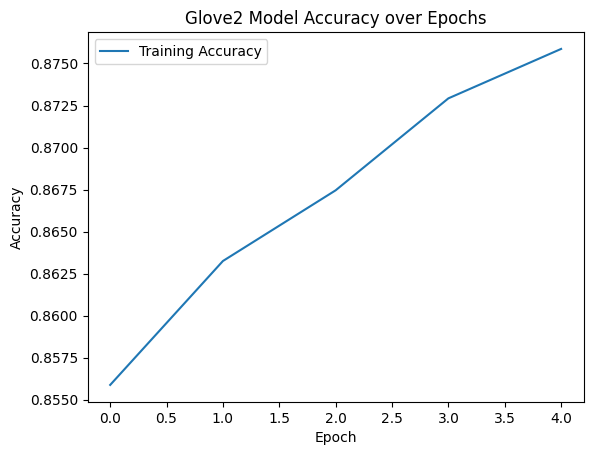

In [142]:
# Plot training accuracy
plt.plot(history[2].history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Glove2 Model Accuracy over Epochs')
plt.legend()
plt.show()

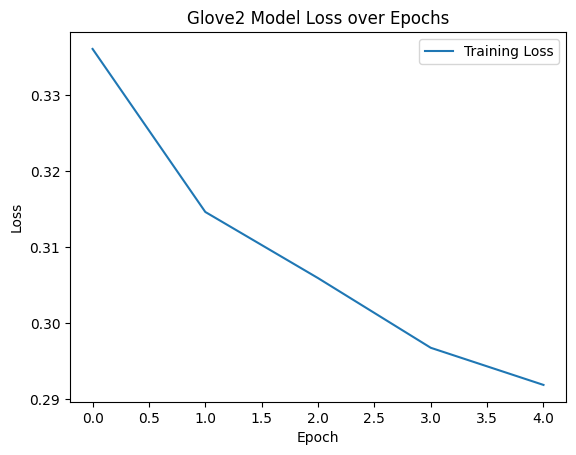

In [143]:
# Plot training loss
plt.plot(history[2].history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Glove2 Model Loss over Epochs')
plt.legend()
plt.show()

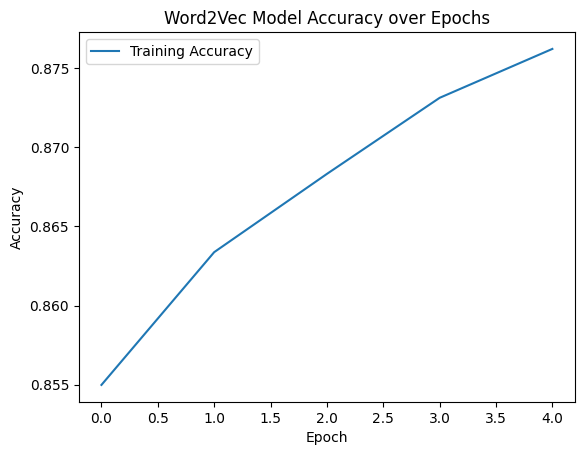

In [144]:
# Plot training accuracy
plt.plot(history[3].history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Word2Vec Model Accuracy over Epochs')
plt.legend()
plt.show()

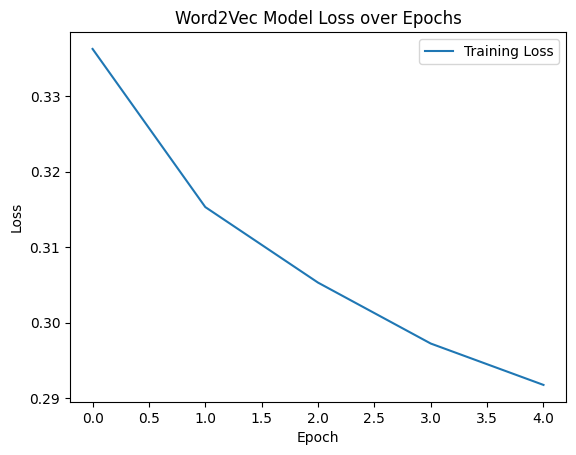

In [145]:
# Plot training loss
plt.plot(history[3].history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Word2Vec Model Loss over Epochs')
plt.legend()
plt.show()

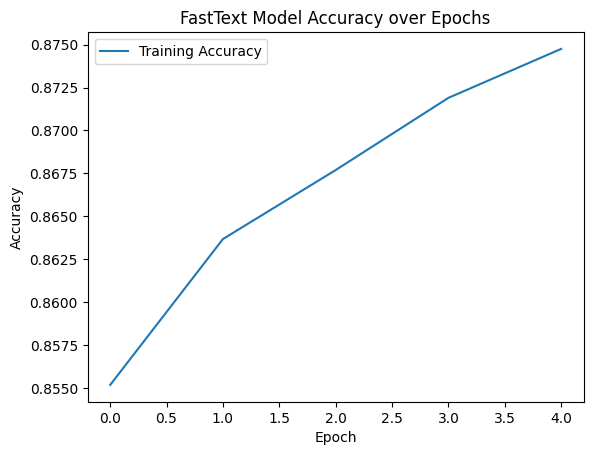

In [146]:
# Plot training accuracy
plt.plot(history[4].history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('FastText Model Accuracy over Epochs')
plt.legend()
plt.show()

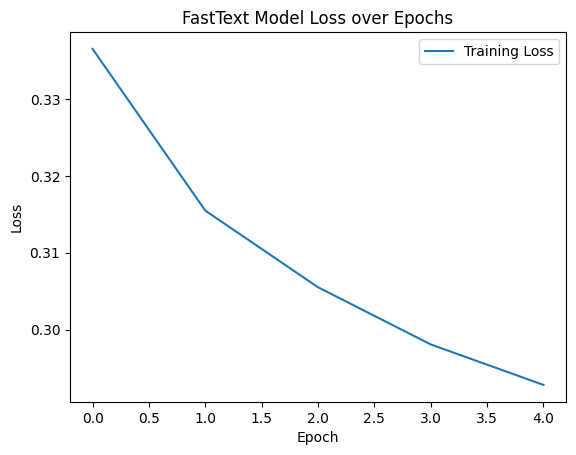

In [147]:
# Plot training loss
plt.plot(history[4].history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('FastText Model Loss over Epochs')
plt.legend()
plt.show()

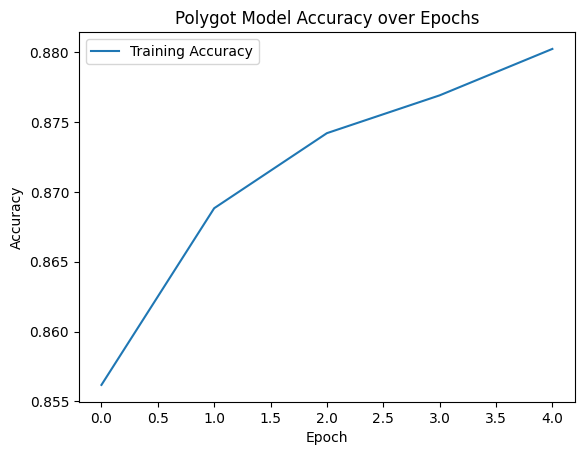

In [148]:
# Plot training accuracy
plt.plot(history[5].history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Polygot Model Accuracy over Epochs')
plt.legend()
plt.show()

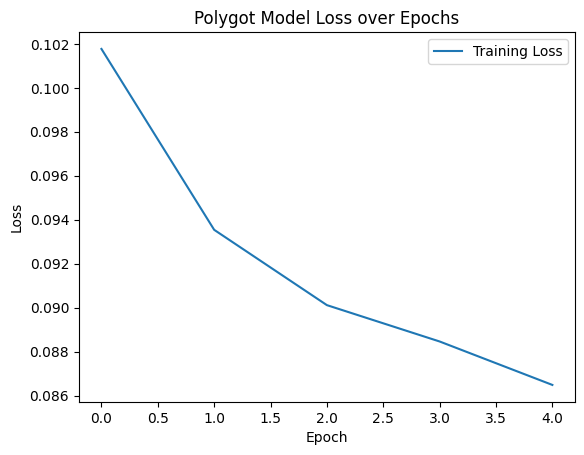

In [149]:
# Plot training loss
plt.plot(history[5].history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Polygot Model Loss over Epochs')
plt.legend()
plt.show()

In [150]:
model_names = ['Sequential', 'Glove1', 'Glove2', 'Word2Vec', 'FastText', 'Polygot']
max_accuracy = []
max_loss = []

for hist in history:
    max_accuracy.append(max(hist.history['accuracy']))
    max_loss.append(max(hist.history['loss']))

print(max_accuracy)
print(max_loss)

[0.9540709853172302, 0.8765718936920166, 0.875866174697876, 0.8761994242668152, 0.8747488260269165, 0.88022780418396]
[0.2549215257167816, 0.32221683859825134, 0.33612748980522156, 0.3362763226032257, 0.3365258574485779, 0.10177028924226761]


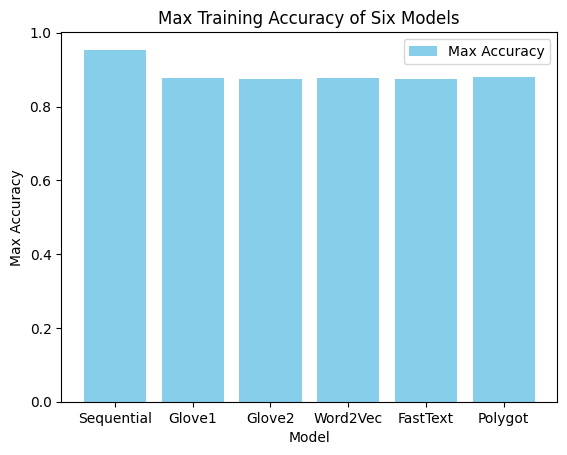

In [151]:
# Plot average accuracy
plt.bar(model_names, max_accuracy, color='skyblue', label='Max Accuracy')
plt.xlabel('Model')
plt.ylabel('Max Accuracy')
plt.title('Max Training Accuracy of Six Models')
plt.legend()

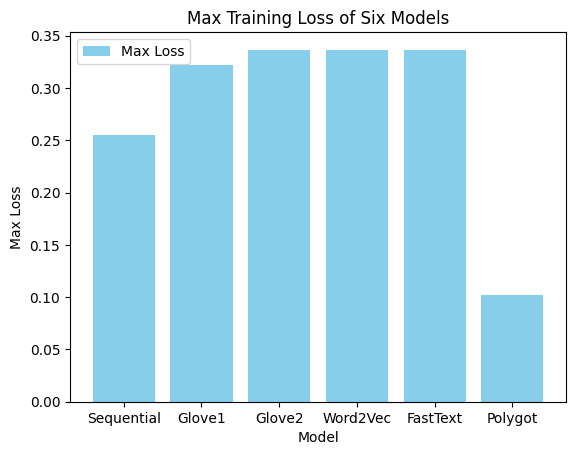

In [152]:
# Plot average accuracy
plt.bar(model_names, max_loss, color='skyblue', label='Max Loss')
plt.xlabel('Model')
plt.ylabel('Max Loss')
plt.title('Max Training Loss of Six Models')
plt.legend()

In [153]:
from sklearn.manifold import TSNE
import numpy as np

word_vectors = np.array(glove_model.vectors[:5000])  # Extract embedding vectors

# Reduce dimensionality to 2D using TSNE
tsne_model = TSNE(n_components=2, random_state=42)  # Set random state for reproducibility
tsne_data = tsne_model.fit_transform(word_vectors)
tsne_data

array([[ 37.000782, -42.722744],
       [ 35.276077, -42.447464],
       [ 38.29088 , -45.134476],
       ...,
       [-72.17681 , -24.701155],
       [-21.620522, -10.85881 ],
       [-42.760506, -16.058456]], dtype=float32)

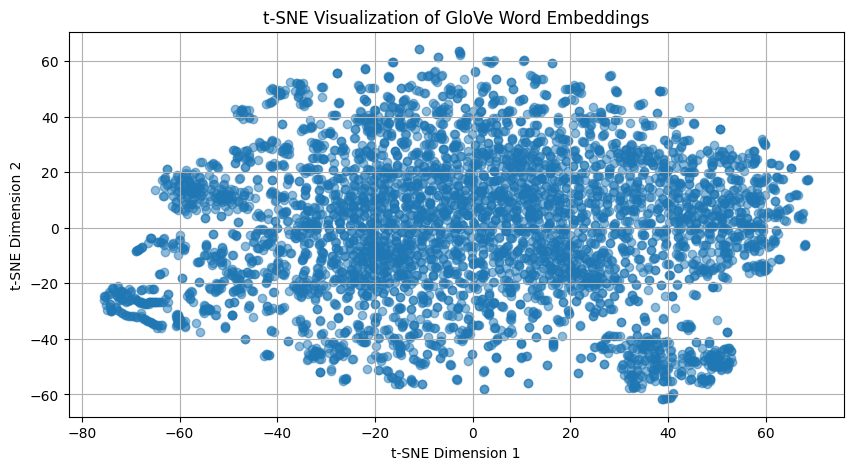

In [154]:
import matplotlib.pyplot as plt

# Extract x and y coordinates from tsne_data
x_coords = tsne_data[:, 0]
y_coords = tsne_data[:, 1]

# Plot the 2D representations
plt.figure(figsize=(10, 5))
plt.scatter(x_coords, y_coords, alpha=0.5)
plt.title('t-SNE Visualization of GloVe Word Embeddings')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True)
plt.show()


In [155]:
from sklearn.manifold import TSNE
import numpy as np

word_vectors2 = np.array(word2vec_model.vectors[:5000])  # Extract embedding vectors

# Reduce dimensionality to 2D using TSNE
tsne_model2 = TSNE(n_components=2, random_state=42)  # Set random state for reproducibility
tsne_data2 = tsne_model2.fit_transform(word_vectors2)
tsne_data2

array([[ 37.000782, -42.722744],
       [ 35.276077, -42.447464],
       [ 38.29088 , -45.134476],
       ...,
       [-72.17681 , -24.701155],
       [-21.620522, -10.85881 ],
       [-42.760506, -16.058456]], dtype=float32)

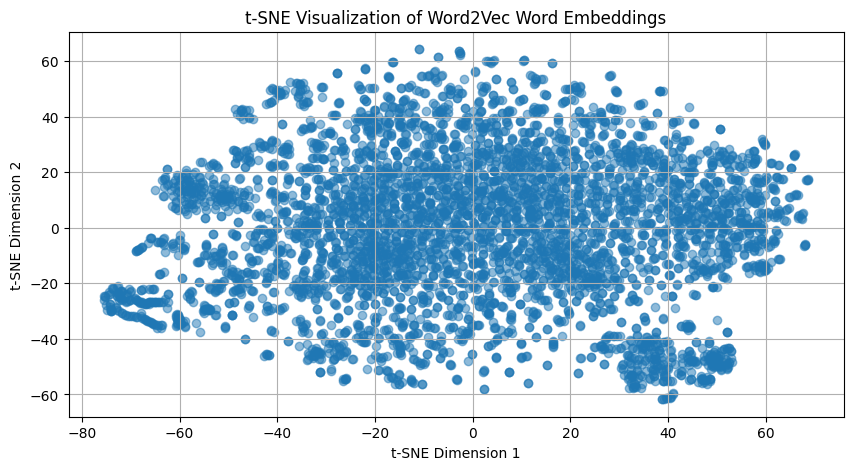

In [156]:
import matplotlib.pyplot as plt

# Extract x and y coordinates from tsne_data
x_coords2 = tsne_data2[:, 0]
y_coords2 = tsne_data2[:, 1]

# Plot the 2D representations
plt.figure(figsize=(10, 5))
plt.scatter(x_coords2, y_coords2, alpha=0.5)
plt.title('t-SNE Visualization of Word2Vec Word Embeddings')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True)
plt.show()


In [157]:
from sklearn.manifold import TSNE
import numpy as np

word_vectors3 = np.array(fasttext_model.vectors[:5000])  # Extract embedding vectors

# Reduce dimensionality to 2D using TSNE
tsne_model3 = TSNE(n_components=2, random_state=42)  # Set random state for reproducibility
tsne_data3 = tsne_model3.fit_transform(word_vectors3)
tsne_data3

array([[ 37.000782, -42.722744],
       [ 35.276077, -42.447464],
       [ 38.29088 , -45.134476],
       ...,
       [-72.17681 , -24.701155],
       [-21.620522, -10.85881 ],
       [-42.760506, -16.058456]], dtype=float32)

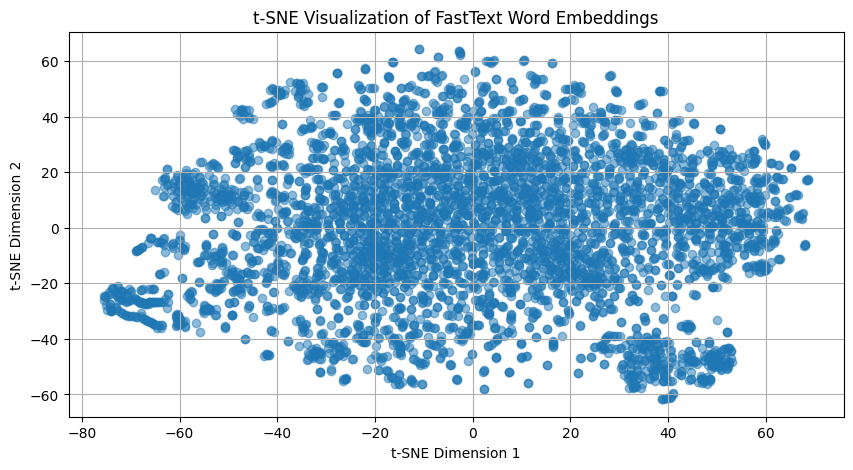

In [158]:
import matplotlib.pyplot as plt

# Extract x and y coordinates from tsne_data
x_coords3 = tsne_data3[:, 0]
y_coords3 = tsne_data3[:, 1]

# Plot the 2D representations
plt.figure(figsize=(10, 5))
plt.scatter(x_coords3, y_coords3, alpha=0.5)
plt.title('t-SNE Visualization of FastText Word Embeddings')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True)
plt.show()


In [159]:
from sklearn.manifold import TSNE
import numpy as np

word_vectors4 = np.array(embeddings_polygot.vectors[:5000])  # Extract embedding vectors

# Reduce dimensionality to 2D using TSNE
tsne_model4 = TSNE(n_components=2, random_state=42)  # Set random state for reproducibility
tsne_data4 = tsne_model4.fit_transform(word_vectors4)
tsne_data4

array([[ -8.844803  ,  26.970224  ],
       [-33.57005   ,  25.117193  ],
       [-33.637653  ,  25.139067  ],
       ...,
       [  0.48912862, -43.17187   ],
       [ -2.977787  , -24.3176    ],
       [-19.66474   ,  11.8976345 ]], dtype=float32)

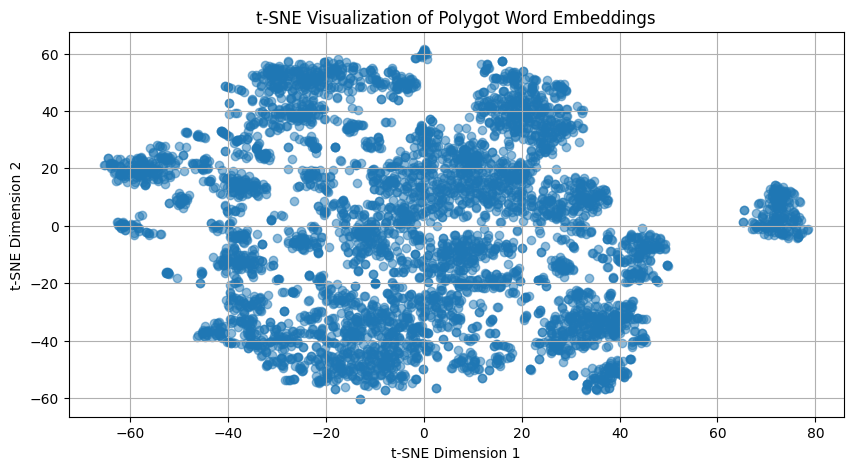

In [160]:
import matplotlib.pyplot as plt

# Extract x and y coordinates from tsne_data
x_coords4 = tsne_data4[:, 0]
y_coords4 = tsne_data4[:, 1]

# Plot the 2D representations
plt.figure(figsize=(10, 5))
plt.scatter(x_coords4, y_coords4, alpha=0.5)
plt.title('t-SNE Visualization of Polygot Word Embeddings')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True)
plt.show()


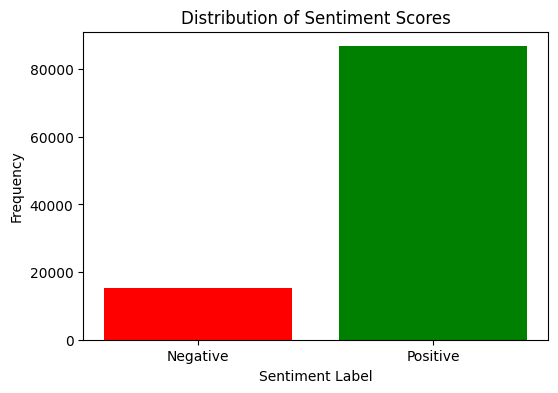

In [161]:
import matplotlib.pyplot as plt
import numpy as np


# Plot bar chart of sentiment labels
plt.figure(figsize=(6, 4))
plt.bar(*np.unique(binary_labels, return_counts=True), color=['red', 'green'])
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()
